In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries to pre-process the variables
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from pickle import dump

In [ ]:
#Libraries to create the Multi-class Neural Network
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers import Dense, Dropout, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#4/1AX4XfWgeHyWFoJRwuStTP-EUbQngtl_nOxMD5lPbebfFAk8pcXTWD5IqrT8

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/moods.csv') 
df.head(2)
#happy sad neutral anger suprised

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.1370,0.730,0.000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.0189,0.832,0.196,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad


In [ ]:
Y = df['mood']

In [ ]:
df.drop(axis = 1, columns = ['name', 'album','mood', 'artist', 'id', 'release_date', 'popularity', 'length', 'liveness', 'tempo', 'key', 'time_signature'], inplace = True)

In [ ]:
X = df
X

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness
0,0.866,0.13700,0.7300,0.000000,0.6250,-8.201,0.0767
1,0.381,0.01890,0.8320,0.196000,0.1660,-5.069,0.0492
2,0.346,0.91300,0.1390,0.000077,0.1160,-15.326,0.0321
3,0.466,0.08900,0.4380,0.000006,0.5870,-12.858,0.0608
4,0.419,0.00171,0.9320,0.000000,0.4450,-3.604,0.1060
...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.1460,-20.615,0.0603
682,0.452,0.75700,0.5150,0.120000,0.1910,-7.351,0.0255
683,0.642,0.78600,0.3740,0.000000,0.0799,-9.386,0.0545
684,0.561,0.91300,0.0848,0.000026,0.2060,-15.099,0.0404


In [ ]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
model = Sequential([  
  InputLayer(input_shape=7),
  Dense(5, activation = 'relu'),
  Dense(4, activation = 'softmax')
  ])
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = '/content/drive/MyDrive/Moodify/music_weights.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics='accuracy')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 24        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/300
5/5 - 1s - loss: 1.2269 - accuracy: 0.5294 - val_loss: 1.1754 - val_accuracy: 0.5818

Epoch 00001: val_accuracy improved from -inf to 0.58182, saving model to /content/drive/MyDrive/Moodify/music_weights.hdf5
Epoch 2/300
5/5 - 0s - loss: 1.1856 - accuracy: 0.5984 - val_loss: 1.1462 - val_accuracy: 0.5273

Epoch 00002: val_accuracy did not improve from 0.58182
Epoch 3/300
5/5 - 0s - loss: 1.1507 - accuracy: 0.6207 - val_loss: 1.1191 - val_accuracy: 0.5091

Epoch 00003: val_accuracy did not improve from 0.58182
Epoch 4/300
5/5 - 0s - loss: 1.1190 - accuracy: 0.6410 - val_loss: 1.0920 - val_accuracy: 0.5455

Epoch 00004: val_accuracy did not improve from 0.58182
Epoch 5/300
5/5 - 0s - loss: 1.0885 - accuracy: 0.6491 - val_loss: 1.0649 - val_accuracy: 0.5818

Epoch 00005: val_accuracy did not improve from 0.58182
Epoch 6/300
5/5 - 0s - loss: 1.0594 - accuracy: 0.6511 - val_loss: 1.0388 - val_accuracy: 0.5818

Epoch 00006: val_accuracy did not improve from 0.58182
Epoch 7/300
5/

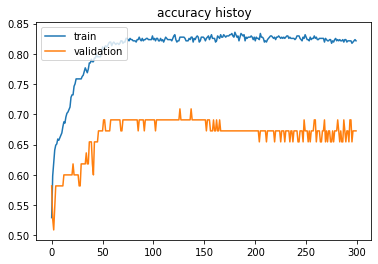

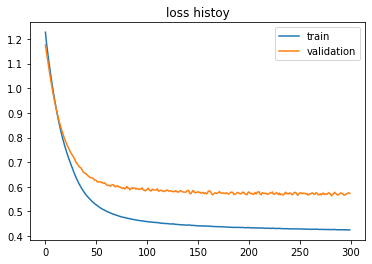

In [ ]:
History=model.fit(X_train,Y_train, batch_size=100, epochs=300, verbose=2,validation_split = 0.1, callbacks=[checkpoint])
plt.title("accuracy histoy")
index=[i for i in range(len(History.history['accuracy']))]
plt.plot(index,History.history['accuracy'],label='train')
plt.plot(index,History.history['val_accuracy'],label='validation')
plt.legend(loc="upper left")
plt.show()
plt.title("loss histoy")
plt.plot(index,History.history['loss'], label='train')
plt.plot(index,History.history['val_loss'], label='validation')
plt.legend(loc="upper right")
plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/Moodify/music_weights.hdf5")
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics='accuracy')
model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8411


[0.378061980009079, 0.8333333134651184]